In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
from tabulate import tabulate
from scipy.stats import skew

In [2]:
df=pd.read_csv("DS1_C5_S1_EmployeeAttrition_Data_Practice.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1458 non-null   object 
 6   EmployeeNumber            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1425 non-null   object 
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   int64  
 11  JobRole                   1460 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1414 non-null   object 
 14  MonthlyI

In [5]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [6]:
df.count()

Age                         1446
Attrition                   1470
BusinessTravel              1440
Department                  1466
DistanceFromHome            1470
EducationField              1458
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1425
HourlyRate                  1470
JobInvolvement              1470
JobRole                     1460
JobSatisfaction             1470
MaritalStatus               1414
MonthlyIncome               1470
NumCompaniesWorked          1470
Over18                      1416
OverTime                    1470
PerformanceRating           1470
RelationshipSatisfaction    1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBalance             1470
YearsAtCompany              1470
YearsInCurrentRole          1470
YearsSinceLastPromotion     1470
YearsWithCurrManager        1470
dtype: int64

In [7]:
Numcol = df.select_dtypes(exclude="object")
Numcol

,Age,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,1,2,94,3,4,5993,8,3,1,8,0,1,6,4,0,5
1,49.0,8,2,3,61,2,2,5130,1,4,4,10,3,3,10,7,1,7
2,37.0,2,4,4,92,2,3,2090,6,3,2,7,3,3,0,0,0,0
3,33.0,3,5,4,56,3,3,2909,1,3,3,8,3,3,8,7,3,0
4,27.0,2,7,1,40,3,2,3468,9,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,23,2061,3,41,4,4,2571,4,3,3,17,3,3,5,2,0,3
1466,39.0,6,2062,4,42,2,1,9991,4,3,1,9,5,3,7,7,1,7
1467,27.0,4,2064,2,87,4,2,6142,1,4,2,6,0,3,6,2,0,3
1468,49.0,2,2065,4,63,2,2,5390,2,3,4,17,3,2,9,6,0,8


In [8]:
Catcol = df.select_dtypes(include="object")
Catcol

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,NaN,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [9]:
# Task 2
Mylist_Num=[]
Mylist_Col=[]
def func1(): 
    Numcol = df.select_dtypes(exclude="object")
    Catcol = df.select_dtypes(include="object")
    Mylist_Num.append(Numcol) 
    Mylist_Col.append(Catcol) 
    print(Mylist_Num)
    print("---------------------------------------------------")
    print(Mylist_Col)


In [10]:
func1()

[       Age  DistanceFromHome  EmployeeNumber  EnvironmentSatisfaction  \
0     41.0                 1               1                        2   
1     49.0                 8               2                        3   
2     37.0                 2               4                        4   
3     33.0                 3               5                        4   
4     27.0                 2               7                        1   
...    ...               ...             ...                      ...   
1465  36.0                23            2061                        3   
1466  39.0                 6            2062                        4   
1467  27.0                 4            2064                        2   
1468  49.0                 2            2065                        4   
1469  34.0                 8            2068                        2   

      HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  \
0             94               3                4     

In [147]:
Mylist_Num

[       Age  DistanceFromHome  EmployeeNumber  EnvironmentSatisfaction  \
 0     41.0                 1               1                        2   
 1     49.0                 8               2                        3   
 2     37.0                 2               4                        4   
 3     33.0                 3               5                        4   
 4     27.0                 2               7                        1   
 ...    ...               ...             ...                      ...   
 1465  36.0                23            2061                        3   
 1466  39.0                 6            2062                        4   
 1467  27.0                 4            2064                        2   
 1468  49.0                 2            2065                        4   
 1469  34.0                 8            2068                        2   
 
       HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  \
 0             94               3        

In [11]:
print(tabulate({"Numerical":Numcol,"Categorical":Catcol},headers=["Numerical","Categorical"]))

Numerical                 Categorical
------------------------  --------------
Age                       Attrition
DistanceFromHome          BusinessTravel
EmployeeNumber            Department
EnvironmentSatisfaction   EducationField
HourlyRate                Gender
JobInvolvement            JobRole
JobSatisfaction           MaritalStatus
MonthlyIncome             Over18
NumCompaniesWorked        OverTime
PerformanceRating
RelationshipSatisfaction
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [12]:
# Task 3
def info_of_cat(col):
    print(f"The unique values in the {col} are:{df[col].nunique()}")
    print(f"The mode values in the {col} are:{df[col].mode()[0]}")
    print(f"The null values in the {col} are:{df[col].isnull().sum()}")

In [13]:
info_of_cat("Attrition")

The unique values in the Attrition are:2
The mode values in the Attrition are:No
The null values in the Attrition are:0


In [14]:
info_of_cat("BusinessTravel")

The unique values in the BusinessTravel are:3
The mode values in the BusinessTravel are:Travel_Rarely
The null values in the BusinessTravel are:30


In [15]:
info_of_cat("Department")

The unique values in the Department are:3
The mode values in the Department are:Research & Development
The null values in the Department are:4


In [16]:
info_of_cat("EducationField")

The unique values in the EducationField are:6
The mode values in the EducationField are:Life Sciences
The null values in the EducationField are:12


In [17]:
info_of_cat("Gender")

The unique values in the Gender are:2
The mode values in the Gender are:Male
The null values in the Gender are:45


In [18]:
info_of_cat("JobRole")

The unique values in the JobRole are:9
The mode values in the JobRole are:Sales Executive
The null values in the JobRole are:10


In [19]:
info_of_cat("MaritalStatus")

The unique values in the MaritalStatus are:3
The mode values in the MaritalStatus are:Married
The null values in the MaritalStatus are:56


In [20]:
info_of_cat("Over18")

The unique values in the Over18 are:1
The mode values in the Over18 are:Y
The null values in the Over18 are:54


In [21]:
info_of_cat("OverTime")

The unique values in the OverTime are:2
The mode values in the OverTime are:No
The null values in the OverTime are:0


In [22]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [23]:
df["BusinessTravel"].mode()[0]

'Travel_Rarely'

In [24]:
df["Department"].mode()[0]

'Research & Development'

In [25]:
df["EducationField"].mode()[0]

'Life Sciences'

In [26]:
df["Gender"].mode()[0]

'Male'

In [27]:
df["JobRole"].mode()[0]

'Sales Executive'

In [28]:
df["MaritalStatus"].mode()[0]

'Married'

In [29]:
df["Over18"].mode()[0]

'Y'

In [30]:
df["BusinessTravel"]=df["BusinessTravel"].fillna(df["BusinessTravel"].mode()[0])

In [31]:
df["Department"]=df["Department"].fillna(df["Department"].mode()[0])

In [32]:
df["EducationField"]=df["EducationField"].fillna(df["EducationField"].mode()[0])

In [33]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [34]:
df["JobRole"]=df["JobRole"].fillna(df['JobRole'].mode()[0])

In [35]:
df["MaritalStatus"]=df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])

In [36]:
df["Over18"]=df["Over18"].fillna(df["Over18"].mode()[0])

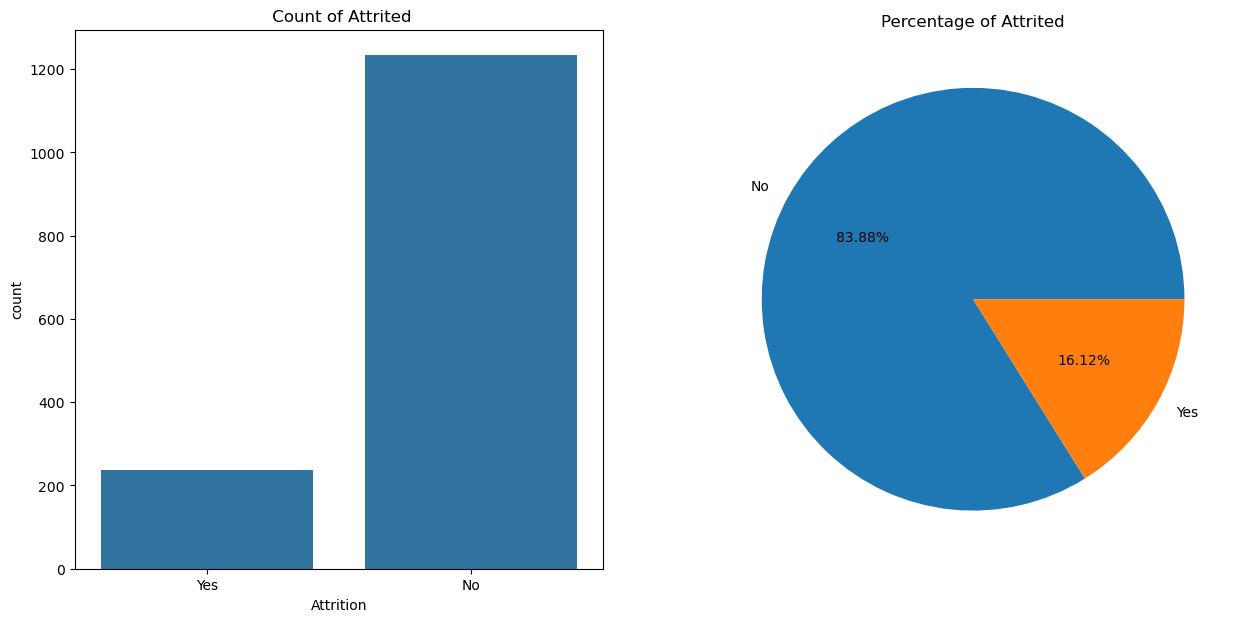

In [37]:
# Task 4
# Task 4(i)
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title(" Count of Attrited")
ax[1].set_title("Percentage of Attrited")
percentage=df["Attrition"].value_counts()
lables=list(df["Attrition"].value_counts().index)
sns.countplot(x=df['Attrition'],ax=ax[0])
plt.pie(percentage,labels=lables,autopct="%.2f%%")
plt.show()

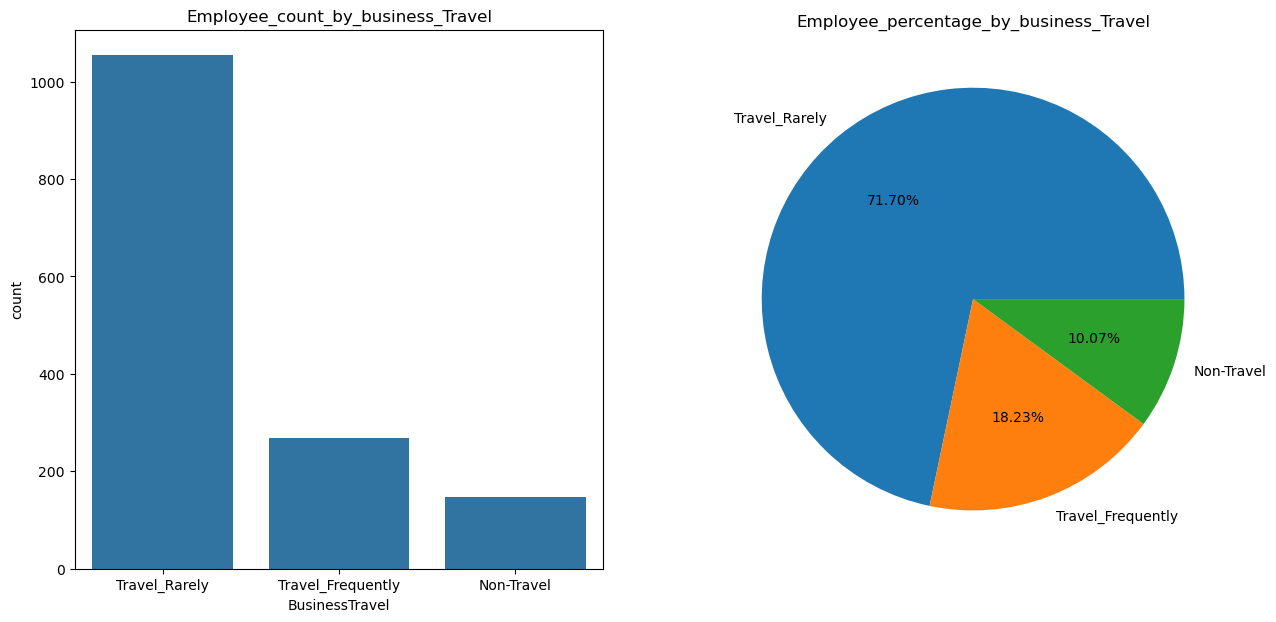

In [38]:
# Task 4(ii)
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Employee_count_by_business_Travel")
ax[1].set_title("Employee_percentage_by_business_Travel")
percentage=df["BusinessTravel"].value_counts()
lables=list(df["BusinessTravel"].value_counts().index)
sns.countplot(x=df["BusinessTravel"],ax=ax[0])
plt.pie(percentage,labels=lables,autopct="%.2f%%")
plt.show()

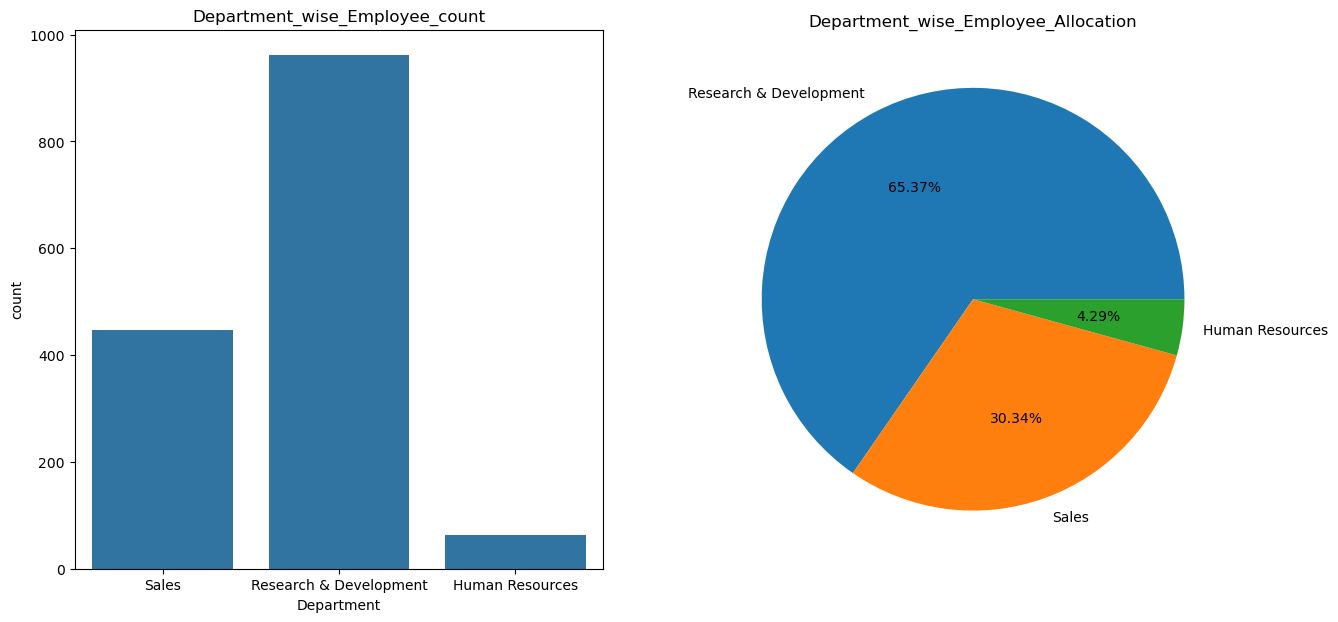

In [39]:
# Task 4(iii)
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Department_wise_Employee_count")
ax[1].set_title("Department_wise_Employee_Allocation")
percentage=df["Department"].value_counts()
lables=list(df["Department"].value_counts().index)
sns.countplot(x=df["Department"],ax=ax[0])
plt.pie(percentage,labels=lables,autopct="%.2f%%")
plt.show()

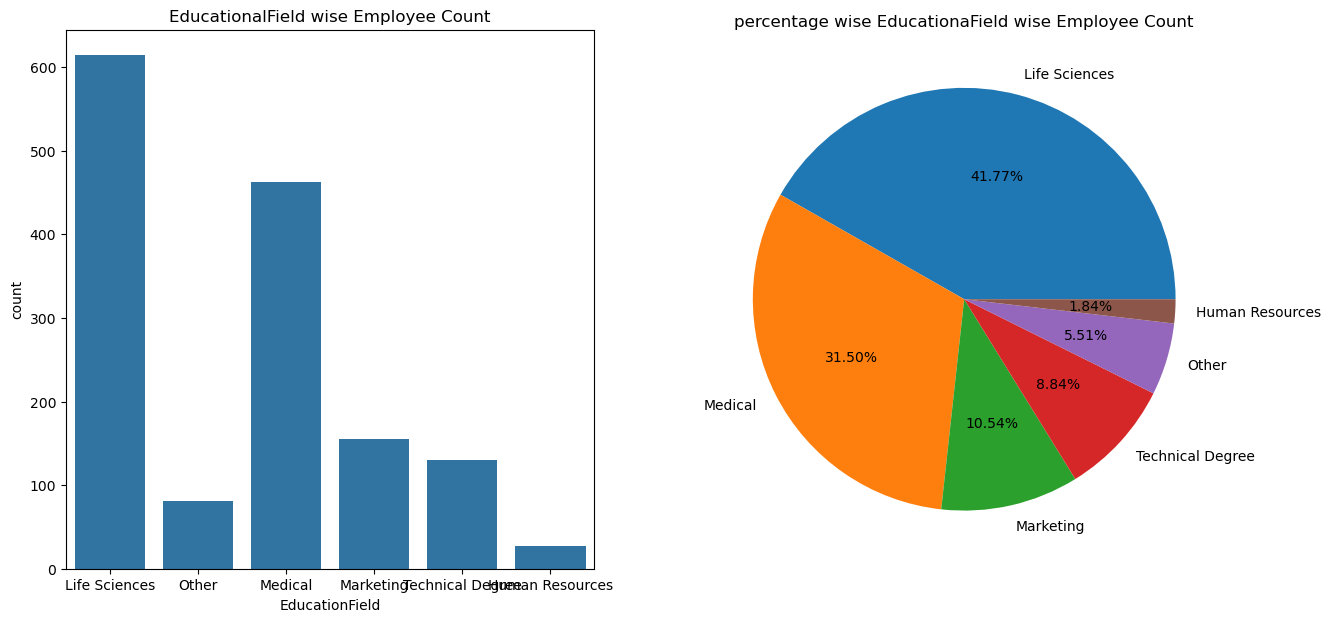

In [40]:
# Task 4(iv)
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("EducationalField wise Employee Count")
ax[1].set_title("percentage wise EducationaField wise Employee Count")
percentage=df["EducationField"].value_counts()
lables=list(df["EducationField"].value_counts().index)
sns.countplot(x=df["EducationField"],ax=ax[0]) 
plt.pie(percentage,labels=lables,autopct="%.2f%%")
plt.show()

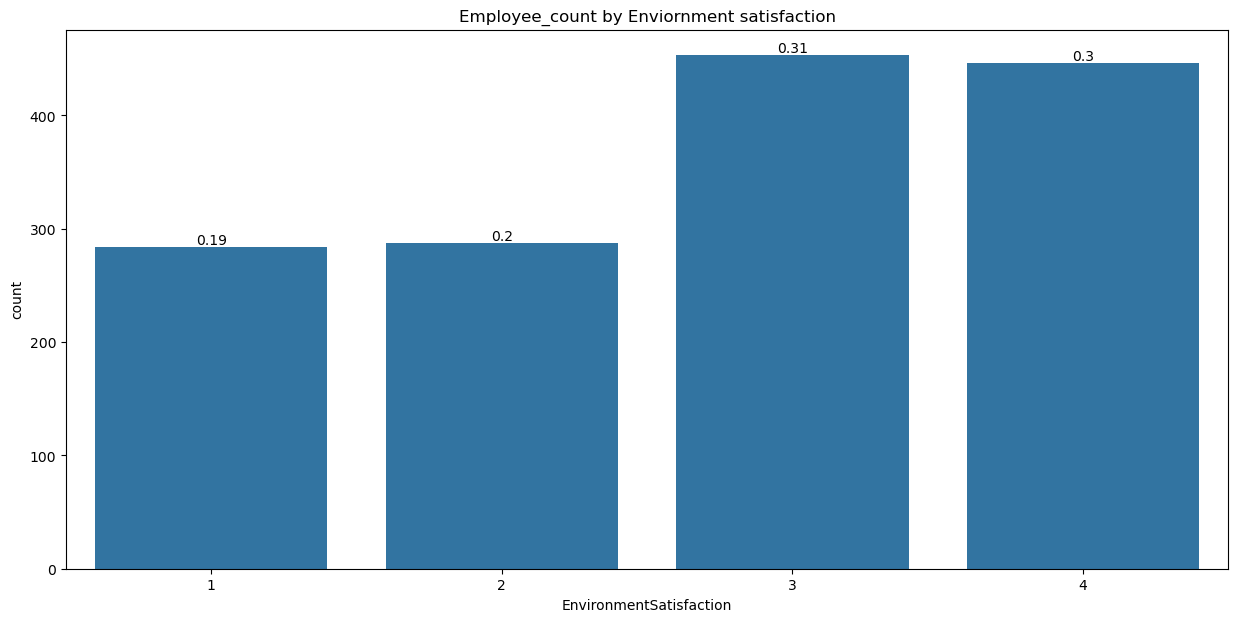

In [41]:
# Task 4(v):
fig,ax=plt.subplots(1,figsize=(15,7))
ax.set_title("Employee_count by Enviornment satisfaction")
sns.countplot(x=df["EnvironmentSatisfaction"],ax=ax)
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(df),2)}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

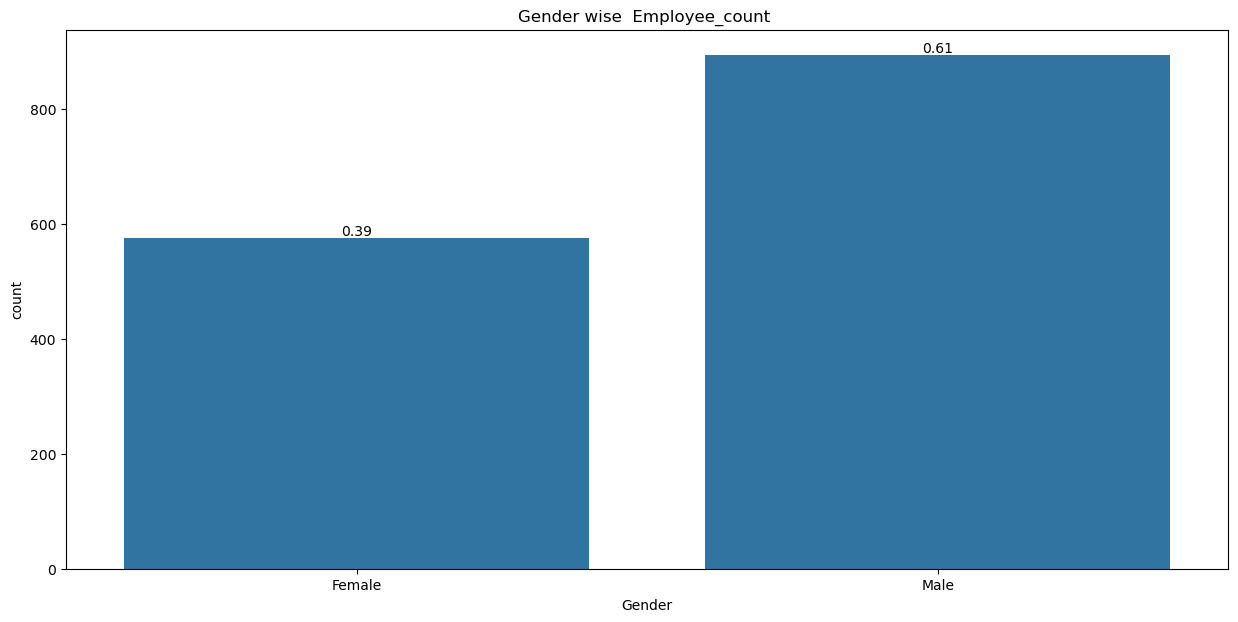

In [42]:
# Task 4(vi):
fig,ax=plt.subplots(1,figsize=(15,7))
ax.set_title("Gender wise  Employee_count ")
sns.countplot(x=df["Gender"],ax=ax)
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(df),2)}"
    x=bar.get_x()+bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

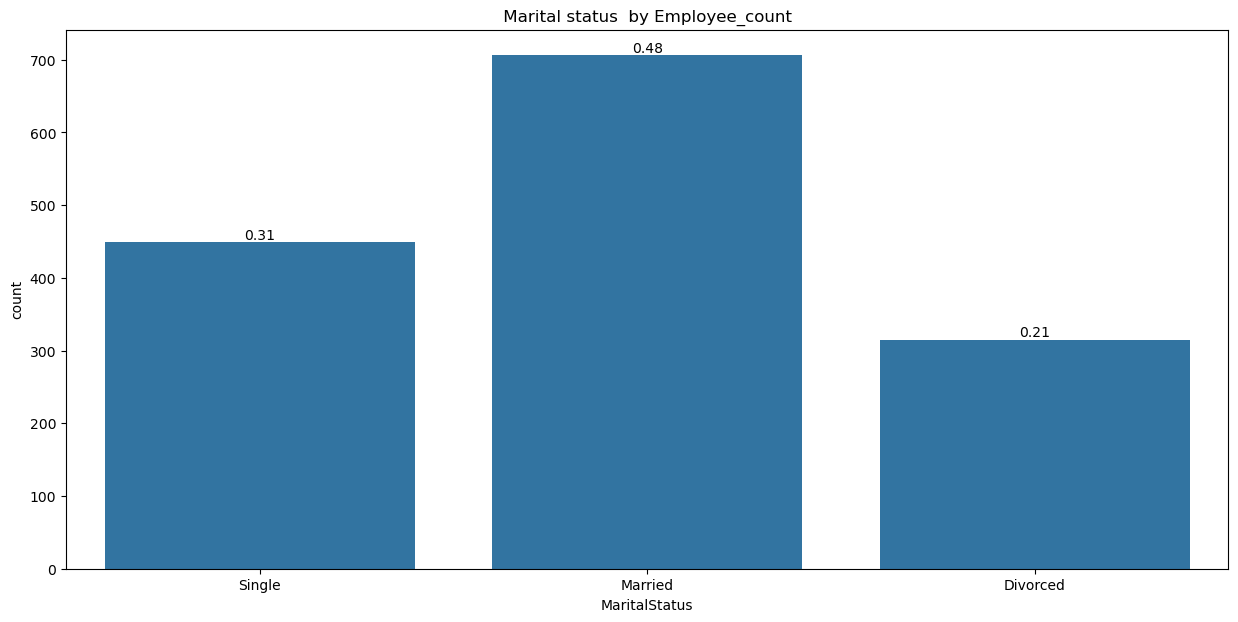

In [43]:
# Task 4(vii)
# Task 4(v):
fig,ax=plt.subplots(1,figsize=(15,7))
ax.set_title(" Marital status  by Employee_count ")
sns.countplot(x=df["MaritalStatus"],ax=ax)
for bar in ax.patches:
    percentage=f"{round(bar.get_height()/len(df),2)}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

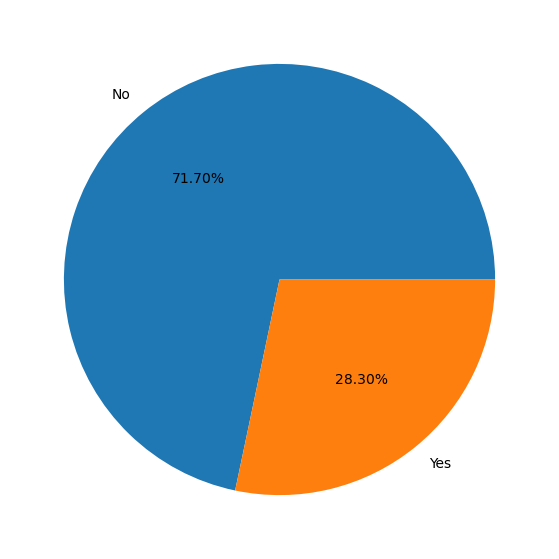

In [44]:
# Task 4(viii):
fig,ax=plt.subplots(1,figsize=(15,7))
percentage=df["OverTime"].value_counts()
lables=list(df["OverTime"].value_counts().index)
plt.pie(percentage,labels=lables,autopct="%.2f%%")
plt.show()

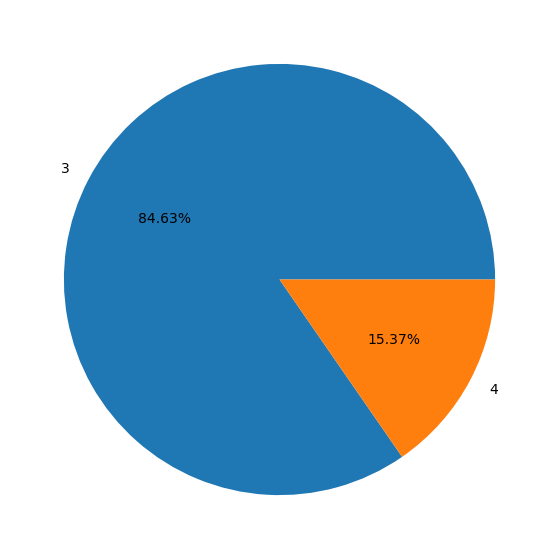

In [45]:
# Task 4(ix):
fig,ax=plt.subplots(1,figsize=(15,7))
percentage=df["PerformanceRating"].value_counts()
lables=list(df["PerformanceRating"].value_counts().index)
plt.pie(percentage,labels=lables,autopct="%.2f%%")
plt.show()

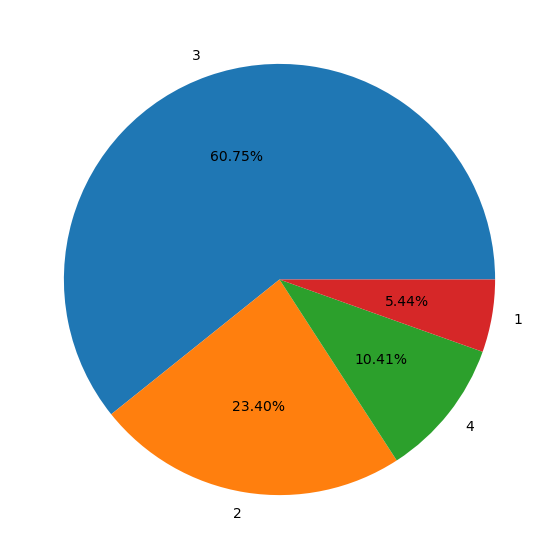

In [46]:
# # Task 4(x):
fig,ax=plt.subplots(1,figsize=(15,7))
percentage=df["WorkLifeBalance"].value_counts()
lables=list(df["WorkLifeBalance"].value_counts().index)
plt.pie(percentage,labels=lables,autopct="%.2f%%")
plt.show()

In [47]:
Numcol

,Age,DistanceFromHome,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,1,2,94,3,4,5993,8,3,1,8,0,1,6,4,0,5
1,49.0,8,2,3,61,2,2,5130,1,4,4,10,3,3,10,7,1,7
2,37.0,2,4,4,92,2,3,2090,6,3,2,7,3,3,0,0,0,0
3,33.0,3,5,4,56,3,3,2909,1,3,3,8,3,3,8,7,3,0
4,27.0,2,7,1,40,3,2,3468,9,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,23,2061,3,41,4,4,2571,4,3,3,17,3,3,5,2,0,3
1466,39.0,6,2062,4,42,2,1,9991,4,3,1,9,5,3,7,7,1,7
1467,27.0,4,2064,2,87,4,2,6142,1,4,2,6,0,3,6,2,0,3
1468,49.0,2,2065,4,63,2,2,5390,2,3,4,17,3,2,9,6,0,8


In [48]:
# Task 5
def measure_of_dispersion(col):
    print(f"The mean for the {col} is :{df[col].mean()}")
    print(f"The median for the {col} is :{df[col].median()}")
    print(f"The standard deviation for the {col} is {df[col].std()}")
    print(f"The missing value for the {col} is {df[col].isnull().sum()}")
    print(f"The skewness of the {col } is {df[col].skew()}")

In [49]:
measure_of_dispersion("Age")

The mean for the Age is :36.93015214384509
The median for the Age is :36.0
The standard deviation for the Age is 9.16220404447615
The missing value for the Age is 24
The skewness of the Age is 0.4090238232052275


In [50]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [51]:
measure_of_dispersion("Age")

The mean for the Age is :36.914965986394556
The median for the Age is :36.0
The standard deviation for the Age is 9.087816436803726
The missing value for the Age is 0
The skewness of the Age is 0.4172955376035819


In [52]:
measure_of_dispersion("DistanceFromHome")

The mean for the DistanceFromHome is :9.19251700680272
The median for the DistanceFromHome is :7.0
The standard deviation for the DistanceFromHome is 8.106864435666084
The missing value for the DistanceFromHome is 0
The skewness of the DistanceFromHome is 0.9581179956568269


In [53]:
measure_of_dispersion("EmployeeNumber")

The mean for the EmployeeNumber is :1024.865306122449
The median for the EmployeeNumber is :1020.5
The standard deviation for the EmployeeNumber is 602.024334847475
The missing value for the EmployeeNumber is 0
The skewness of the EmployeeNumber is 0.016574019580105036


In [54]:
measure_of_dispersion("EnvironmentSatisfaction")

The mean for the EnvironmentSatisfaction is :2.721768707482993
The median for the EnvironmentSatisfaction is :3.0
The standard deviation for the EnvironmentSatisfaction is 1.0930822146349994
The missing value for the EnvironmentSatisfaction is 0
The skewness of the EnvironmentSatisfaction is -0.32165444773937907


In [55]:
measure_of_dispersion("HourlyRate")

The mean for the HourlyRate is :65.89115646258503
The median for the HourlyRate is :66.0
The standard deviation for the HourlyRate is 20.329427593996158
The missing value for the HourlyRate is 0
The skewness of the HourlyRate is -0.03231095290044942


In [56]:
measure_of_dispersion("JobInvolvement")

The mean for the JobInvolvement is :2.7299319727891156
The median for the JobInvolvement is :3.0
The standard deviation for the JobInvolvement is 0.7115611429632283
The missing value for the JobInvolvement is 0
The skewness of the JobInvolvement is -0.4984193640419493


In [57]:
measure_of_dispersion("JobSatisfaction")

The mean for the JobSatisfaction is :2.7285714285714286
The median for the JobSatisfaction is :3.0
The standard deviation for the JobSatisfaction is 1.1028461230547149
The missing value for the JobSatisfaction is 0
The skewness of the JobSatisfaction is -0.3296719586636647


In [58]:
measure_of_dispersion("MonthlyIncome")

The mean for the MonthlyIncome is :6502.931292517007
The median for the MonthlyIncome is :4919.0
The standard deviation for the MonthlyIncome is 4707.956783097995
The missing value for the MonthlyIncome is 0
The skewness of the MonthlyIncome is 1.3698166808390662


In [59]:
measure_of_dispersion("NumCompaniesWorked")

The mean for the NumCompaniesWorked is :2.6931972789115646
The median for the NumCompaniesWorked is :2.0
The standard deviation for the NumCompaniesWorked is 2.498009006070751
The missing value for the NumCompaniesWorked is 0
The skewness of the NumCompaniesWorked is 1.026471111968205


In [60]:
measure_of_dispersion("PerformanceRating")

The mean for the PerformanceRating is :3.1537414965986397
The median for the PerformanceRating is :3.0
The standard deviation for the PerformanceRating is 0.36082352460434486
The missing value for the PerformanceRating is 0
The skewness of the PerformanceRating is 1.921882702142603


In [61]:
measure_of_dispersion("RelationshipSatisfaction")

The mean for the RelationshipSatisfaction is :2.7122448979591836
The median for the RelationshipSatisfaction is :3.0
The standard deviation for the RelationshipSatisfaction is 1.081208886440361
The missing value for the RelationshipSatisfaction is 0
The skewness of the RelationshipSatisfaction is -0.30282756517072296


In [62]:
measure_of_dispersion("TotalWorkingYears")

The mean for the TotalWorkingYears is :11.279591836734694
The median for the TotalWorkingYears is :10.0
The standard deviation for the TotalWorkingYears is 7.780781675515004
The missing value for the TotalWorkingYears is 0
The skewness of the TotalWorkingYears is 1.1171718528128527


In [63]:
measure_of_dispersion("TrainingTimesLastYear")

The mean for the TrainingTimesLastYear is :2.7993197278911564
The median for the TrainingTimesLastYear is :3.0
The standard deviation for the TrainingTimesLastYear is 1.2892706207958435
The missing value for the TrainingTimesLastYear is 0
The skewness of the TrainingTimesLastYear is 0.5531241710537028


In [64]:
measure_of_dispersion("WorkLifeBalance")

The mean for the WorkLifeBalance is :2.7612244897959184
The median for the WorkLifeBalance is :3.0
The standard deviation for the WorkLifeBalance is 0.7064758297141522
The missing value for the WorkLifeBalance is 0
The skewness of the WorkLifeBalance is -0.5524802990965146


In [65]:
measure_of_dispersion("YearsAtCompany")

The mean for the YearsAtCompany is :7.0081632653061225
The median for the YearsAtCompany is :5.0
The standard deviation for the YearsAtCompany is 6.126525152403566
The missing value for the YearsAtCompany is 0
The skewness of the YearsAtCompany is 1.7645294543422085


In [66]:
measure_of_dispersion("YearsInCurrentRole")

The mean for the YearsInCurrentRole is :4.229251700680272
The median for the YearsInCurrentRole is :3.0
The standard deviation for the YearsInCurrentRole is 3.6231370346706395
The missing value for the YearsInCurrentRole is 0
The skewness of the YearsInCurrentRole is 0.9173631562908262


In [67]:
measure_of_dispersion("YearsSinceLastPromotion")

The mean for the YearsSinceLastPromotion is :2.1877551020408164
The median for the YearsSinceLastPromotion is :1.0
The standard deviation for the YearsSinceLastPromotion is 3.222430279137968
The missing value for the YearsSinceLastPromotion is 0
The skewness of the YearsSinceLastPromotion is 1.9842899833524859


In [68]:
measure_of_dispersion("YearsWithCurrManager")

The mean for the YearsWithCurrManager is :4.12312925170068
The median for the YearsWithCurrManager is :3.0
The standard deviation for the YearsWithCurrManager is 3.5681361205404407
The missing value for the YearsWithCurrManager is 0
The skewness of the YearsWithCurrManager is 0.8334509919918475


<Axes: title={'center': 'Boxplot'}, xlabel='Age'>

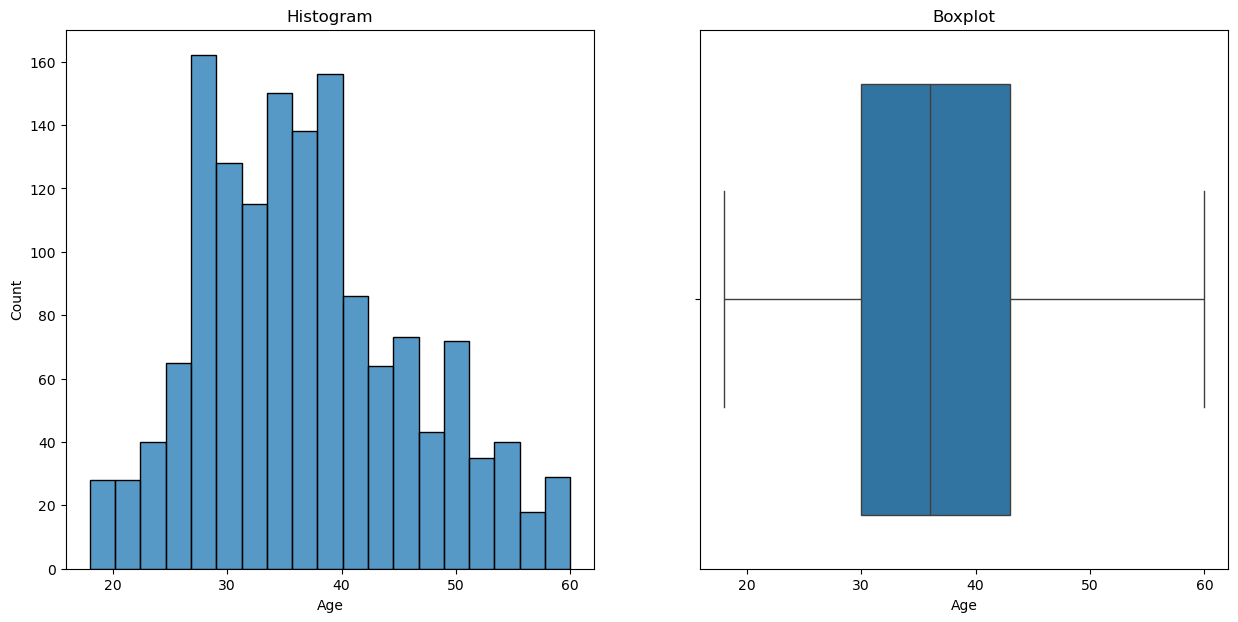

In [69]:
# Task 6
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Histogram")
ax[1].set_title("Boxplot")
# percentage=df["Age"].value_counts()
sns.histplot(df["Age"],ax=ax[0])
sns.boxplot(x=df["Age"],ax=ax[1])

<Axes: title={'center': 'Boxplot'}, xlabel='HourlyRate'>

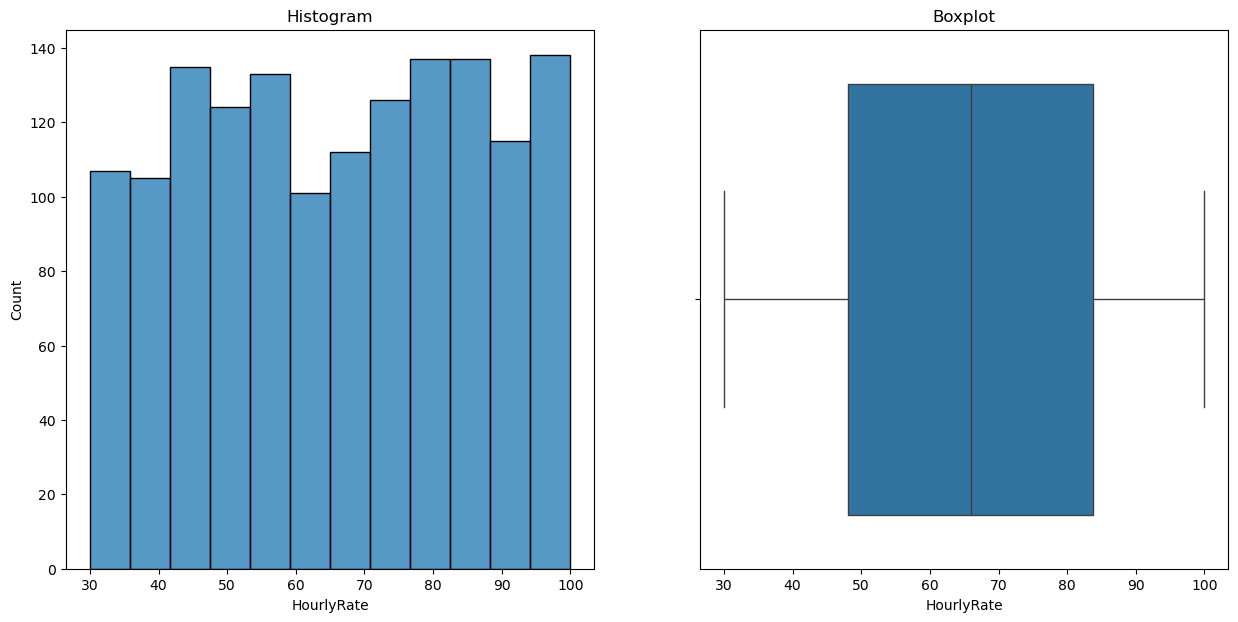

In [70]:
# Task 6(ii)
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Histogram")
ax[1].set_title("Boxplot")
# percentage=df["Age"].value_counts()
sns.histplot(df["HourlyRate"],ax=ax[0])
sns.boxplot(x=df["HourlyRate"],ax=ax[1])

<Axes: title={'center': 'Boxplot'}, xlabel='MonthlyIncome'>

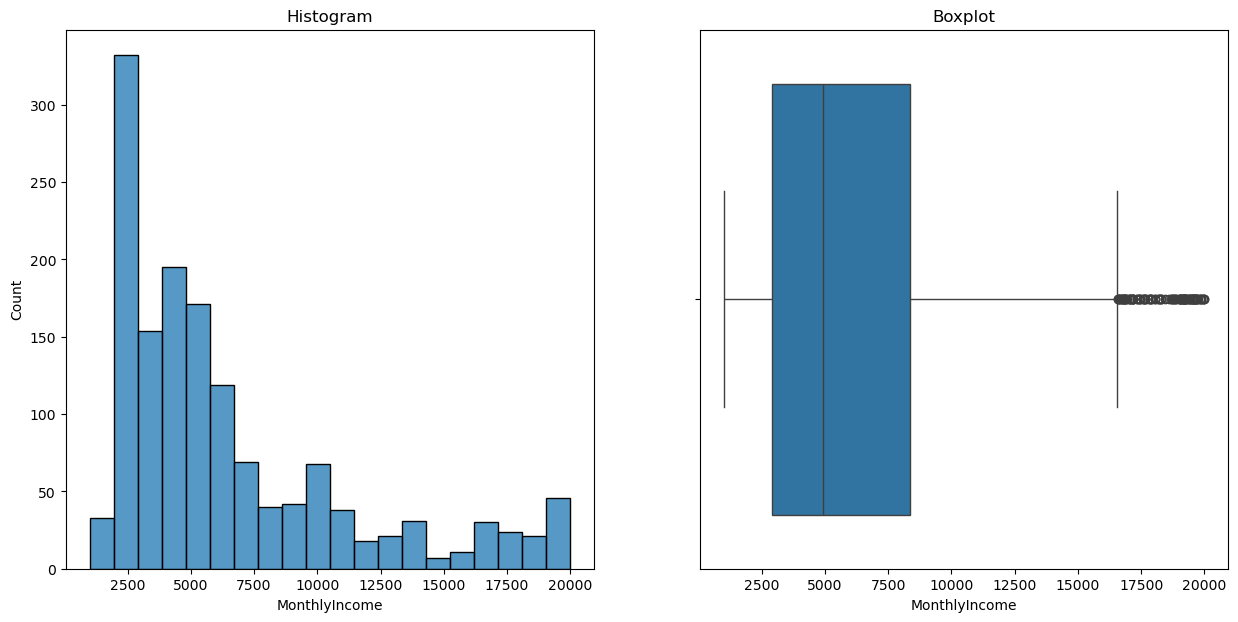

In [71]:
# Task 6(iii)
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title("Histogram")
ax[1].set_title("Boxplot")
# percentage=df["Age"].value_counts()
sns.histplot(df["MonthlyIncome"],ax=ax[0])
sns.boxplot(x=df["MonthlyIncome"],ax=ax[1])